<a href="https://colab.research.google.com/github/LeonimerMelo/CNNs/blob/main/Data_Augmentation_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Augmentation
Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or using deep learning to generate new data points.

Augmented data is driven from original data with some minor changes. In the case of image augmentation, we make geometric and color space transformations (flipping, resizing, cropping, brightness, contrast) to increase the size and diversity of the training set.

The augmentation techniques are not limited to images. You can augment audio, video, text, and other types of data too.

##When should you yse Data Augmentation?  

* To prevent models from overfitting.
* The initial training set is too small.
* To improve the model accuracy.
* To reduce the operational cost of labeling and cleaning the raw dataset.


In [ ]:
!pip install -U albumentations -q
import albumentations as A

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.9/227.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.4/606.4 kB 16.3 MB/s eta 0:00:00


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

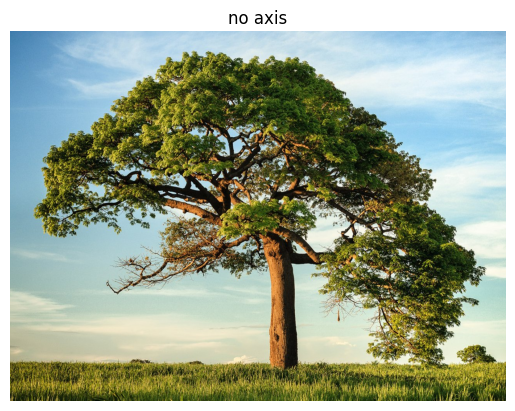

In [ ]:
data  = Image.open('/content/drive/MyDrive/Colab Notebooks/images/arvore1.jpg')
plt.imshow(data, aspect='auto')
plt.axis('off')
plt.title('no axis')
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/arvore_original.jpg')
plt.show()

In [ ]:
np.array(data).shape

(853, 1280, 3)

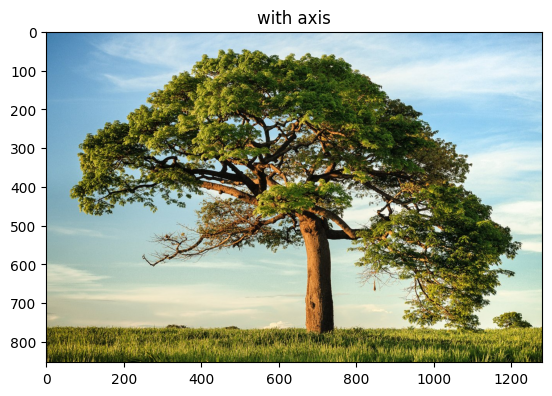

In [ ]:
plt.imshow(data)
plt.title('with axis')
plt.show()

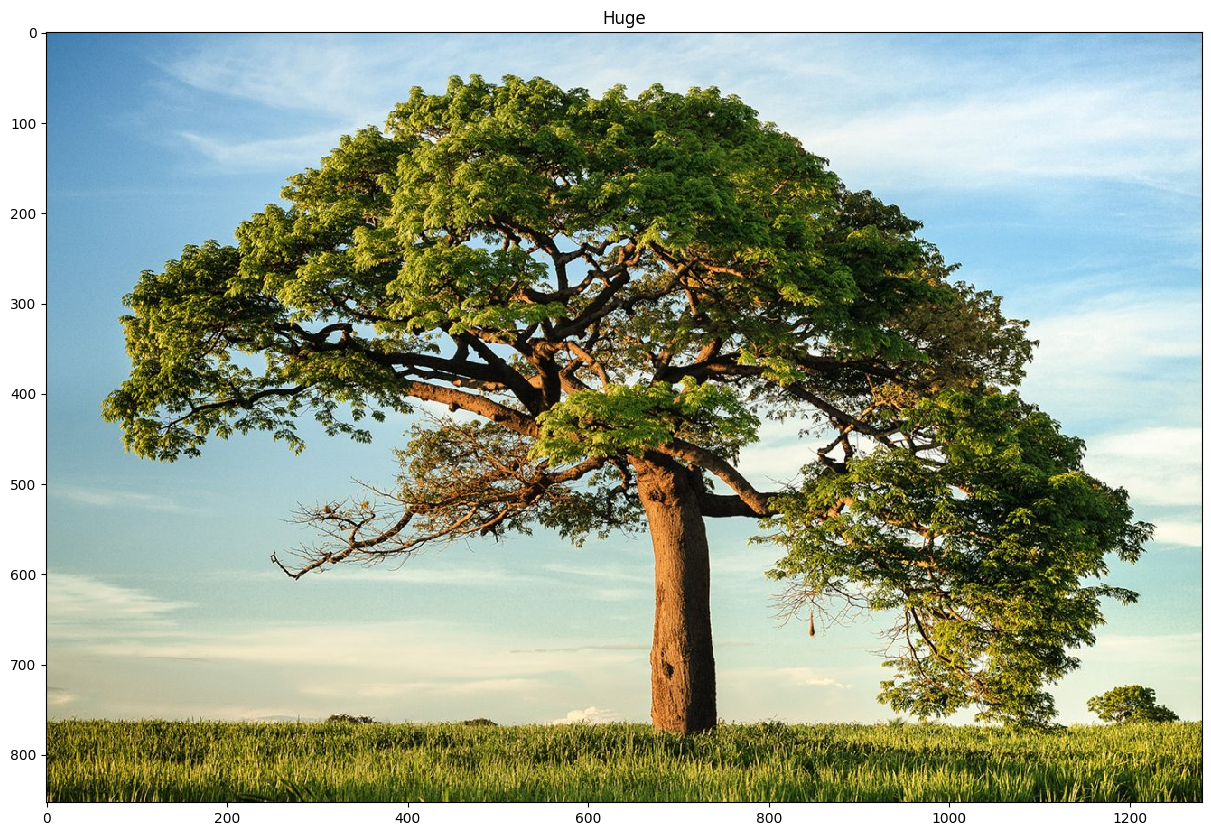

In [ ]:
plt.figure(figsize = (100,10))
plt.title('Huge')
plt.imshow(data, interpolation='nearest')
plt.show()

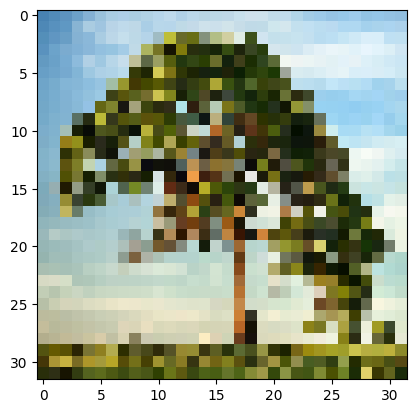

In [ ]:
# image resize
im = np.array(data)
a=A.Resize(width=32, height=32)(image=im)['image']
plt.imshow(a)
plt.show()

In [ ]:
# image general transformation
image = np.array(data)
random.seed(7)
images = [data,
         A.Resize(width=32, height=32)(image=image)['image'],
         A.Blur(blur_limit=(95, 95), p=1)(image=image)['image'],
         A.GaussNoise(var_limit=(5.0,10.0), p=1.0, mean=-50.0)(image=image)['image'],
         A.Rotate(-30)(image=image)['image'],
         A.VerticalFlip(p=1)(image=image)['image'],
         A.ChannelShuffle(p=1)(image=image)['image'],
         A.RandomGridShuffle(grid=(7, 7), p=1)(image=image)['image'],
         A.Compose([
               A.Resize(width=64, height=64),
               A.CenterCrop(width=45, height=45)
         ])(image=image)['image']]

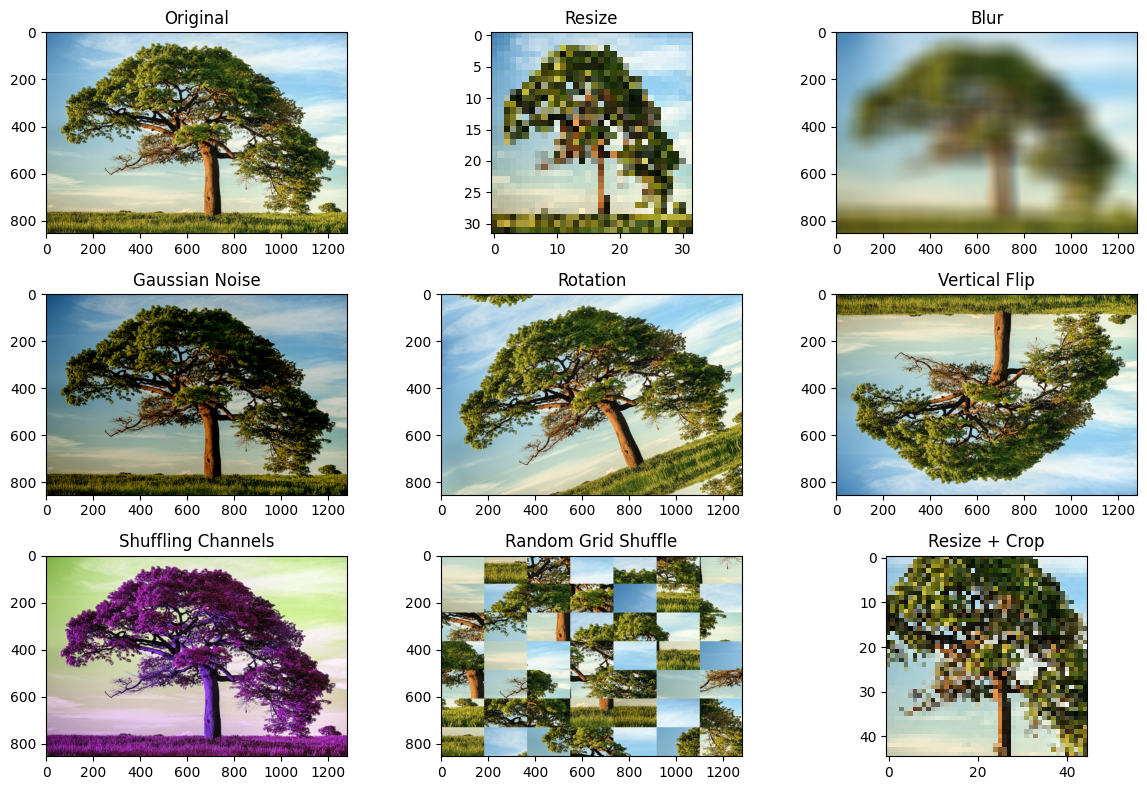

In [ ]:
# plot images transformation
titles=["Original", "Resize", "Blur",
       "Gaussian Noise", "Rotation", "Vertical Flip",
       "Shuffling Channels", "Random Grid Shuffle",
       "Resize + Crop"]
fig=plt.figure(figsize=(12, 8))
for i in range(len(images)):
  #ax = fig.add_subplot(3, 3, i+1, xticks=[], yticks=[])
  ax = fig.add_subplot(3, 3, i+1)
  ax.imshow(images[i])
  ax.set_title(titles[i],size=12)
plt.tight_layout()
plt.show()

##Referências
[1] https://albumentations.ai/docs/examples/example/

[2] https://www.datacamp.com/tutorial/complete-guide-data-augmentation

[3] https://distrito.me/blog/data-augmentation-o-que-e-e-como-usar-essa-tecnica/

[4] https://www.tensorflow.org/tutorials/images/data_augmentation?hl=en